In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 取得資料

In [2]:
data = pd.read_csv('mnist.csv')
x = np.array(data)[:, :784]
x.shape

(1000, 784)

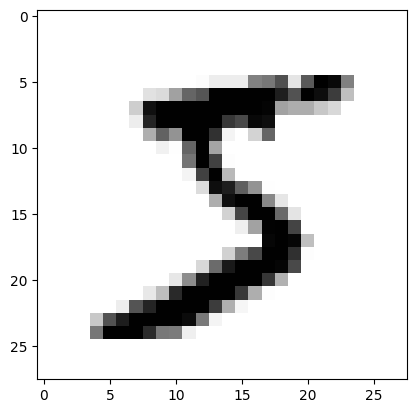

In [3]:
i = 0
xi_image = x[i].reshape(28, 28)
plt.imshow(xi_image, cmap='binary')
plt.show()

In [4]:
y = np.array(data)[:, 784]
np.bincount(y)

array([ 97, 116,  99,  93, 105,  92,  94, 117,  87, 100])

## Split Data

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, random_state = 1)
print(x_train.shape, x_test.shape)
# Preprocessing
x_train = x_train/255
x_test = x_test/255


(750, 784) (250, 784)


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    print(e)

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

2023-03-09 15:32:49.880137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 15:32:50.364695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64
2023-03-09 15:32:50.364748: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/

In [7]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=300, use_bias=False, kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(units=200,kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=.01),
    keras.layers.Dense(units=100, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.PReLU(),  
    keras.layers.Dense(units=10, activation='softmax', kernel_initializer='glorot_uniform')
])

2023-03-09 15:32:50.864557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 15:32:51.206309: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
# model.summary()

In [9]:
opt = keras.optimizers.SGD(clipnorm=0.9)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

In [10]:
train = model.fit(x_train, y_train,
                  epochs=50,
                  validation_split=0.2)

Epoch 1/50


2023-03-09 15:32:53.149963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-09 15:32:53.181339: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x563ba45841c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-09 15:32:53.181353: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-09 15:32:53.211517: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 [==============================] - 2s 12ms/step - loss: 2.3053 - accuracy: 0.1700 - val_loss: 2.2522 - val_accuracy: 0.1333
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 1.9772 - accuracy: 0.3350 - val_loss: 2.1084 - val_accuracy: 0.2800
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 1.7444 - accuracy: 0.4517 - val_loss: 1.9559 - val_accuracy: 0.3933
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 1.4977 - accuracy: 0.5617 - val_loss: 1.7976 - val_accuracy: 0.4800
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 1.3470 - accuracy: 0.6333 - val_loss: 1.6462 - val_accuracy: 0.5667
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 1.1741 - accuracy: 0.6967 - val_loss: 1.4970 - val_accuracy: 0.6400
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 1.0436 - accuracy: 0.7483 - val_loss: 1.3577 - val_accuracy: 0.6867
Epoch 8/50
19/19 [============

In [11]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8760


[0.4256240129470825, 0.8759999871253967]